In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews_data_dictionary.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings_data_dictionary.csv


In [54]:
reviews_dict = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews_data_dictionary.csv")

In [55]:
reviews_dict

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


In [56]:
reviews = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews.csv")

In [57]:
reviews

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859
...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516
5373139,47823964,727963021,2021-01-31,76411977
5373140,47896175,728548625,2021-02-02,71370946
5373141,47900451,727399287,2021-01-29,109011160


In [58]:
listings_dict = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings_data_dictionary.csv")

In [59]:
listings_dict

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


In [60]:
listings =  pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv",
                        encoding = "ISO-8859-1",low_memory=False) 

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [63]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [64]:
listings["city"].value_counts()

city
Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: count, dtype: int64

In [65]:
paris_listings = listings[listings["city"] =="Paris"]
paris_listings = paris_listings.loc[:,["listing_id","host_since","neighbourhood","city","accommodates","price"]]

In [66]:
paris_listings 

,listing_id,host_since,neighbourhood,city,accommodates,price
0,281420,2011-12-03,Buttes-Montmartre,Paris,2,53
1,3705183,2013-11-29,Buttes-Montmartre,Paris,2,120
2,4082273,2014-07-31,Elysee,Paris,2,89
3,4797344,2013-12-17,Vaugirard,Paris,2,58
4,4823489,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...,...
279707,38338635,2015-04-13,Observatoire,Paris,2,120
279708,38538692,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,38683356,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,39659000,2015-07-16,Popincourt,Paris,2,105


In [67]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     64690 non-null  int64 
 1   host_since     64657 non-null  object
 2   neighbourhood  64690 non-null  object
 3   city           64690 non-null  object
 4   accommodates   64690 non-null  int64 
 5   price          64690 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.5+ MB


In [68]:
paris_listings.isna()

,listing_id,host_since,neighbourhood,city,accommodates,price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
279707,False,False,False,False,False,False
279708,False,False,False,False,False,False
279709,False,False,False,False,False,False
279710,False,False,False,False,False,False


In [69]:
paris_listings.isna().sum()

listing_id        0
host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [70]:
paris_listings.dropna(how = "any",inplace = True)

In [71]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     64657 non-null  int64 
 1   host_since     64657 non-null  object
 2   neighbourhood  64657 non-null  object
 3   city           64657 non-null  object
 4   accommodates   64657 non-null  int64 
 5   price          64657 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.5+ MB


In [72]:
paris_listings["host_since"]=pd.to_datetime(paris_listings["host_since"])

In [73]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     64657 non-null  int64         
 1   host_since     64657 non-null  datetime64[ns]
 2   neighbourhood  64657 non-null  object        
 3   city           64657 non-null  object        
 4   accommodates   64657 non-null  int64         
 5   price          64657 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.5+ MB


In [74]:
paris_listings.describe()

,listing_id,host_since,accommodates,price
count,6.465700e+04,64657,64657.000000,64657.000000
mean,2.424035e+07,2015-11-01 11:06:05.528867584,3.037877,113.104614
min,2.577000e+03,2008-08-30 00:00:00,0.000000,0.000000
25%,1.181517e+07,2014-03-09 00:00:00,2.000000,59.000000
50%,2.395412e+07,2015-07-07 00:00:00,2.000000,80.000000
75%,3.721013e+07,2017-05-29 00:00:00,4.000000,120.000000
max,4.809185e+07,2021-02-07 00:00:00,16.000000,12000.000000
std,1.432650e+07,NaN,1.588382,214.479626


In [75]:
paris_listings= paris_listings[(paris_listings["price"]!=0)]

In [76]:
paris_listings

,listing_id,host_since,neighbourhood,city,accommodates,price
0,281420,2011-12-03,Buttes-Montmartre,Paris,2,53
1,3705183,2013-11-29,Buttes-Montmartre,Paris,2,120
2,4082273,2014-07-31,Elysee,Paris,2,89
3,4797344,2013-12-17,Vaugirard,Paris,2,58
4,4823489,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...,...
279707,38338635,2015-04-13,Observatoire,Paris,2,120
279708,38538692,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,38683356,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,39659000,2015-07-16,Popincourt,Paris,2,105


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<Axes: >

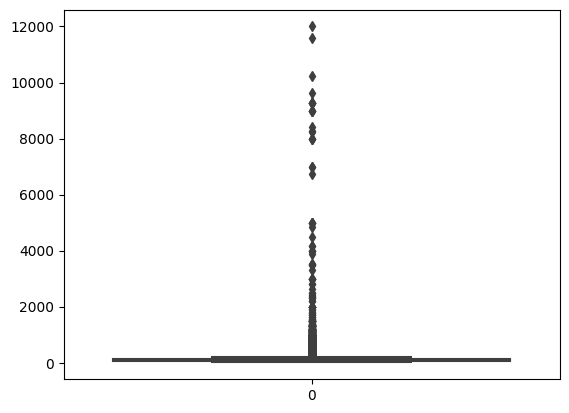

In [78]:
sns.boxplot(paris_listings["price"])

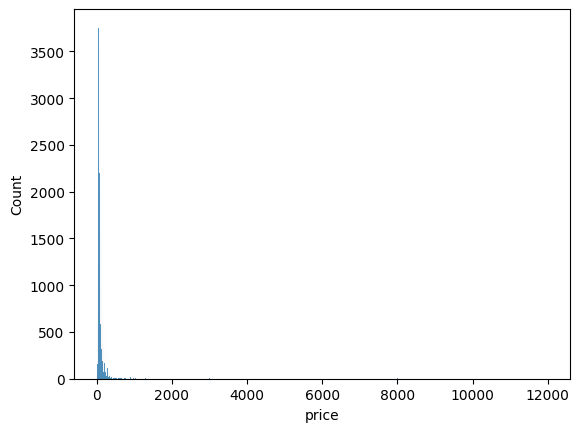

In [79]:
#sns.kdeplot(paris_listings["price"])
sns.histplot(paris_listings["price"])
plt.show()

In [80]:
#paris_listings["price"].quantile(0.75),paris_listings["price"].quantile(0.5),paris_listings["price"].quantile(0.25)

In [81]:
upper_limit = np.mean(paris_listings["price"])+3*np.std(paris_listings["price"])

In [82]:
paris_listings = paris_listings[paris_listings["price"]<upper_limit]

In [83]:
paris_listings.describe()

,listing_id,host_since,accommodates,price
count,6.419200e+04,64192,64192.000000,64192.000000
mean,2.417964e+07,2015-10-28 06:37:15.643070720,3.018367,103.218376
min,2.577000e+03,2008-08-30 00:00:00,1.000000,8.000000
25%,1.176660e+07,2014-03-07 00:00:00,2.000000,59.000000
50%,2.383710e+07,2015-07-05 00:00:00,2.000000,80.000000
75%,3.714562e+07,2017-05-20 00:00:00,4.000000,119.000000
max,4.809185e+07,2021-02-07 00:00:00,16.000000,756.000000
std,1.431458e+07,NaN,1.528200,81.350333


In [84]:
paris_listings.describe(include ="object")

,neighbourhood,city
count,64192,64192
unique,20,1
top,Buttes-Montmartre,Paris
freq,7203,64192


In [85]:
paris_listings["neighbourhood"].value_counts()

neighbourhood
Buttes-Montmartre      7203
Popincourt             6188
Vaugirard              4799
Enclos-St-Laurent      4598
Batignolles-Monceau    4309
Menilmontant           3747
Buttes-Chaumont        3712
Passy                  3158
Opera                  3141
Temple                 2920
Reuilly                2644
Observatoire           2471
Gobelins               2271
Bourse                 2147
Pantheon               2127
Luxembourg             1975
Hotel-de-Ville         1958
Palais-Bourbon         1741
Elysee                 1694
Louvre                 1389
Name: count, dtype: int64

In [86]:
paris_listings_avg_price = paris_listings.groupby("neighbourhood").agg({"price":"mean"})
paris_listings_avg_price.sort_values("price",ascending = False,inplace=True)

In [87]:
paris_listings_avg_price

,price
neighbourhood,
Elysee,170.344746
Louvre,149.980562
Luxembourg,144.372658
Palais-Bourbon,142.155658
Hotel-de-Ville,137.365169
Passy,132.595313
Bourse,132.476479
Temple,126.439384
Pantheon,117.982605


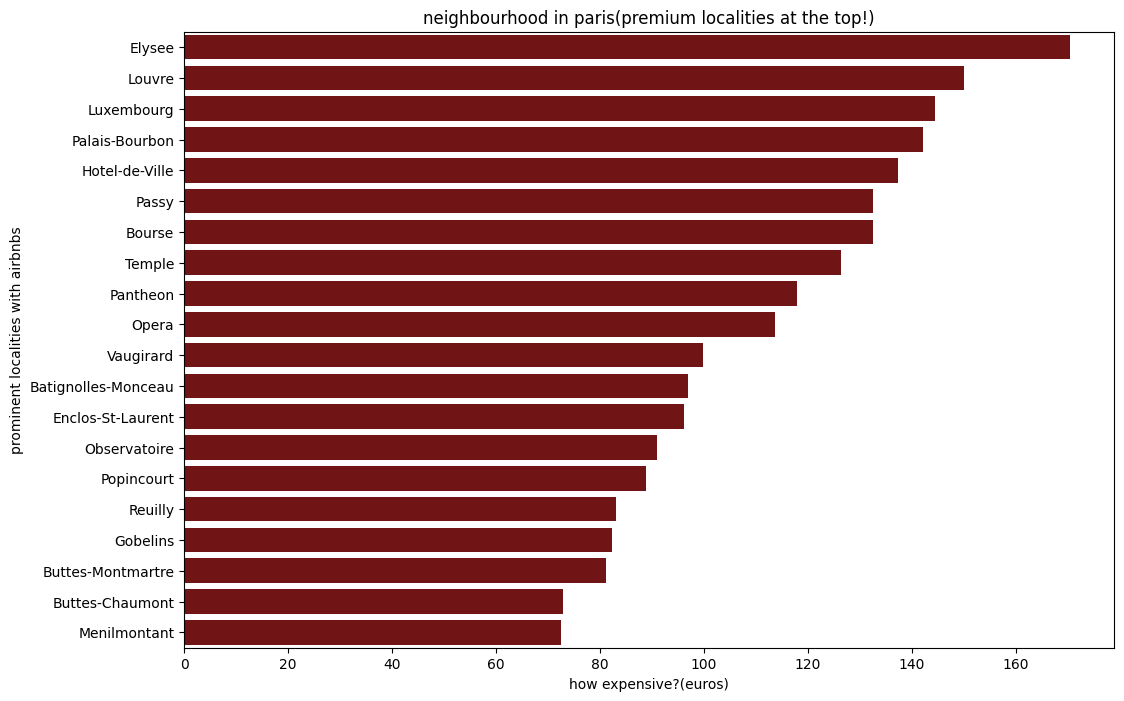

In [88]:
plt.figure(figsize = (12,8))
sns.barplot(data = paris_listings_avg_price,
           x="price",
           y=paris_listings_avg_price.index,color = "#7f0508")
plt.title("neighbourhood in paris(premium localities at the top!)")
plt.xlabel("how expensive?(euros)")
plt.ylabel("prominent localities with airbnbs")
plt.show()

In [89]:
paris_listings_accommodates = paris_listings.groupby("accommodates").agg({"price":"mean"})
paris_listings_accommodates.sort_values("price",ascending = False,inplace=True)

In [90]:
paris_listings_accommodates

,price
accommodates,
13,475.000000
14,438.125000
11,419.880000
12,394.542373
15,337.250000
9,335.807229
10,329.181818
8,271.515510
7,231.254902


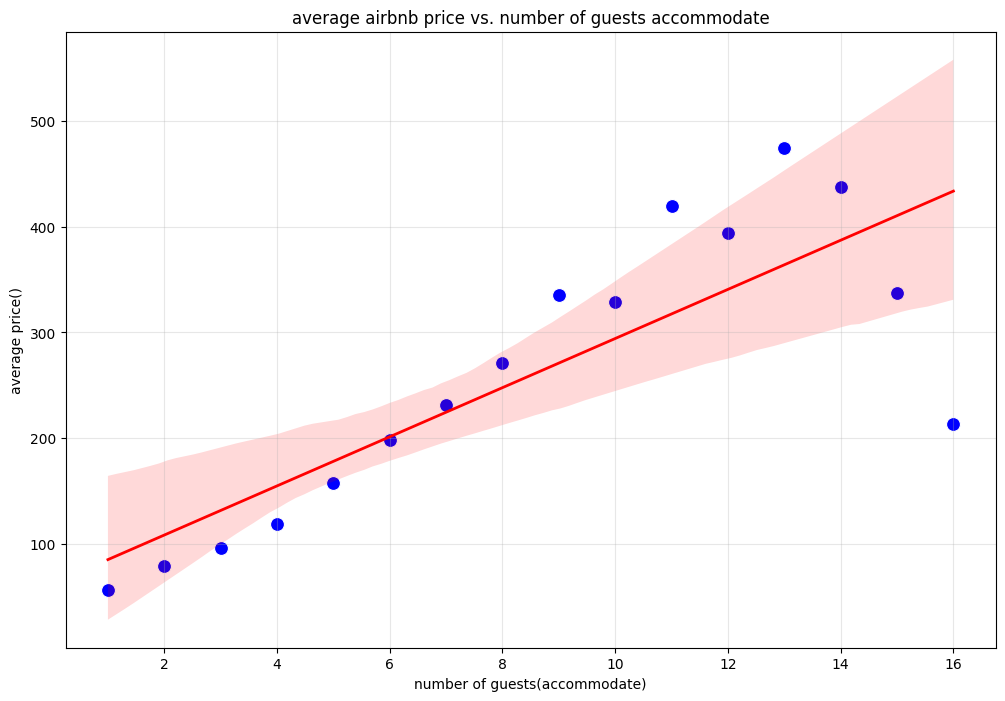

In [91]:
plt.figure(figsize = (12,8))
sns.scatterplot(x="accommodates",y="price",data=paris_listings_accommodates,s=100,color="blue")
# add a trendline
sns.regplot(x=paris_listings_accommodates.index,y="price",data=paris_listings_accommodates,
          scatter=False,color="red",line_kws={"linewidth":2})

plt.title("average airbnb price vs. number of guests accommodate")
plt.xlabel("number of guests(accommodate)")
plt.ylabel("average price()")
plt.grid(alpha=0.3)
plt.show()

In [92]:
paris_listings["year_of_listings"] = paris_listings["host_since"].dt.year

In [93]:
paris_listings.head()

,listing_id,host_since,neighbourhood,city,accommodates,price,year_of_listings
0,281420,2011-12-03,Buttes-Montmartre,Paris,2,53,2011
1,3705183,2013-11-29,Buttes-Montmartre,Paris,2,120,2013
2,4082273,2014-07-31,Elysee,Paris,2,89,2014
3,4797344,2013-12-17,Vaugirard,Paris,2,58,2013
4,4823489,2014-12-14,Passy,Paris,2,60,2014


In [94]:
paris_listings_final_analysis = paris_listings.groupby("year_of_listings").agg({
    "listing_id":"count","price":"mean"
})
paris_listings_final_analysis

,listing_id,price
year_of_listings,,
2008,4,77.750000
2009,105,142.114286
2010,415,120.995181
2011,1333,109.597149
2012,4576,107.654283
2013,8128,104.295153
2014,10889,96.403067
2015,12100,96.397438
2016,8767,100.576366


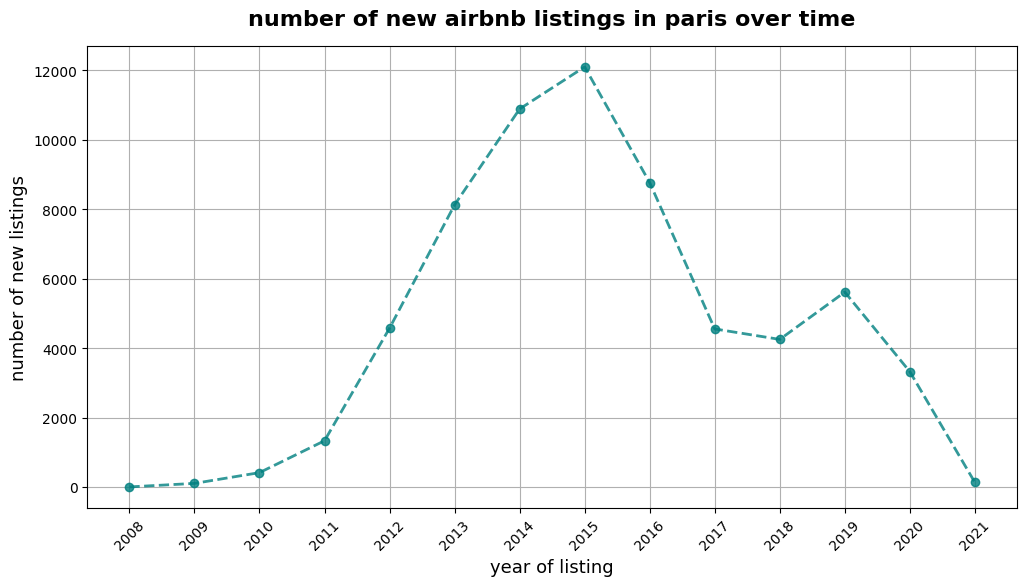

In [95]:
plt.figure(figsize = (12,6))
plt.plot(paris_listings_final_analysis.index,paris_listings_final_analysis["listing_id"],
         marker="o",linestyle = "--",linewidth = 2,color = "teal",alpha = 0.8)
plt.title("number of new airbnb listings in paris over time",fontsize = 16,
         fontweight = "bold",pad = 15)
plt.xlabel("year of listing",fontsize = 13)
plt.ylabel("number of new listings",fontsize = 13)

plt.grid()
plt.xticks(paris_listings_final_analysis.index,rotation = 45)
plt.show()

In [96]:
paris_listings_final_analysis

,listing_id,price
year_of_listings,,
2008,4,77.750000
2009,105,142.114286
2010,415,120.995181
2011,1333,109.597149
2012,4576,107.654283
2013,8128,104.295153
2014,10889,96.403067
2015,12100,96.397438
2016,8767,100.576366


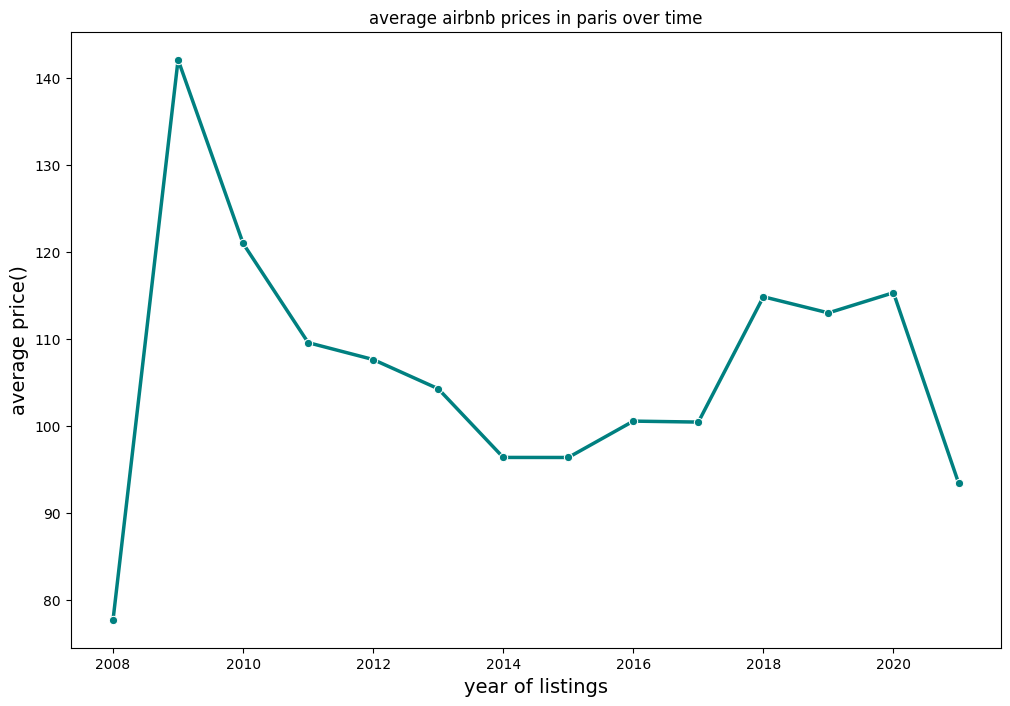

In [98]:
plt.figure(figsize=(12,8))
sns.lineplot(
    x="year_of_listings",
    y="price",
    data=paris_listings_final_analysis,
    marker="o",
    linewidth=2.5,
    color="teal"    
)

plt.title("average airbnb prices in paris over time")
plt.xlabel("year of listings",fontsize=14)
plt.ylabel("average price()",fontsize=14)
plt.show()





In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot number of listings (left y-axis)
ax.plot(
    paris_listings_final_analysis.index, 
    paris_listings_final_analysis["listing_id"], 
    color="teal", linewidth=2.5, marker="o", label="Number of Listings"
)
ax.set_xlabel("Year of Listing", fontsize=14)
ax.set_ylabel("Number of New Listings", fontsize=14, color="teal")
ax.tick_params(axis="y", labelcolor="teal")

# Secondary y-axis for price
ax2 = ax.twinx()
ax2.plot(
    paris_listings_final_analysis.index, 
    paris_listings_final_analysis["price"], 
    color="darkorange", linewidth=2.5, marker="s", label="Average Price (€)"
)
ax2.set_ylabel("Average Price (€)", fontsize=14, color="darkorange")
ax2.tick_params(axis="y", labelcolor="darkorange")
ax2.set_ylim(0)

# Titles and grid
plt.title("Airbnb Listings vs. Average Price in Paris (2008–2021)", fontsize=18, fontweight="bold", pad=15)
ax.grid(alpha=0.3, linestyle="--")

# Highlight regulation year (2017)
ax.axvline(x=2017, color="red", linestyle="--", linewidth=2, alpha=0.8, label="Regulation (2017)")

# Shade post-2017 period
ax.axvspan(2017, paris_listings_final_analysis.index.max(), color="red", alpha=0.1)

# Add text inside shaded area
ax.text(
    2017.5, 
    ax.get_ylim()[1]*0.9,   # position text near the top of shaded area
    "Post-regulation era", 
    color="red", fontsize=13, fontweight="bold"
)

# ---- Annotations ----
# Peak in listings (2015–2016)
peak_year = paris_listings_final_analysis["listing_id"].idxmax()
peak_val = paris_listings_final_analysis["listing_id"].max()
ax.annotate(
    f"Peak Listings\n({peak_year}: {peak_val:,})",
    xy=(peak_year, peak_val),
    xytext=(peak_year-2, peak_val+2000),
    arrowprops=dict(arrowstyle="->", color="teal"),
    fontsize=12, color="teal"
)

# Lowest price point (2014)
low_year = paris_listings_final_analysis["price"].idxmin()
low_val = paris_listings_final_analysis["price"].min()
ax2.annotate(
    f"Lowest Price\n({low_year}: €{low_val:.0f})",
    xy=(low_year, low_val),
    xytext=(low_year+1, low_val-15),
    arrowprops=dict(arrowstyle="->", color="darkorange"),
    fontsize=12, color="darkorange"
)

# Price rebound post-2017
ax2.annotate(
    "Price rebound\npost-regulation",
    xy=(2018, paris_listings_final_analysis.loc[2018, "price"]),
    xytext=(2014.5, 130),
    arrowprops=dict(arrowstyle="->", color="darkorange"),
    fontsize=12, color="darkorange"
)

# Legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, fontsize=12, loc="upper left")

plt.tight_layout()
plt.show()